<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Why Python for Finance?

## Finance and Python Syntax

In [1]:
import math
import numpy as np  # <1>

In [2]:
S0 = 100.  # <2>
K = 105.  # <2>
T = 1.0  # <2>
r = 0.05  # <2>
sigma = 0.2  # <2>

In [3]:
I = 100000  # <2>

In [4]:
np.random.seed(1000)  # <3>

In [5]:
z = np.random.standard_normal(I)  # <4>

In [6]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  # <5>

In [7]:
hT = np.maximum(ST - K, 0)  # <6>

In [8]:
C0 = math.exp(-r * T) * np.mean(hT)  # <7>

In [9]:
print('Value of the European call option: {:5.3f}.'.format(C0))  # <8>

Value of the European call option: 8.019.


In [10]:
%run bsm_mcs_euro.py

Value of the European call option 7.989.


## Time-to-Results

In [11]:
import numpy as np  # <1>
import pandas as pd  # <1>
from pylab import plt, mpl  # <2>

In [12]:
plt.style.use('seaborn')  # <2>
mpl.rcParams['font.family'] = 'serif'  # <2>
%matplotlib inline

In [13]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)  # <3>
data = pd.DataFrame(data['.SPX']) # <4>
data.dropna(inplace=True)  # <4>
data.info()  # <5>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
.SPX    2138 non-null float64
dtypes: float64(1)
memory usage: 33.4 KB


In [14]:
data['rets'] = np.log(data / data.shift(1))  # <6>
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)  # <7>

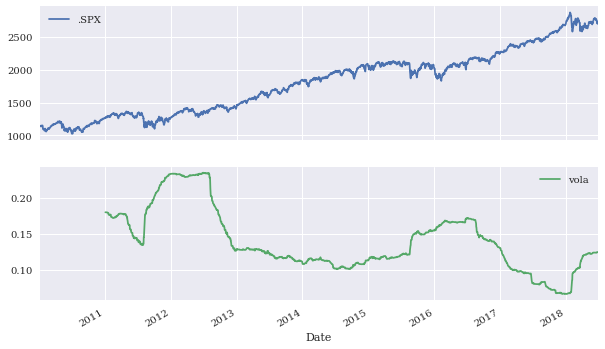

In [15]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));  # <8>
plt.savefig('../images/spx_volatility.png')

## Idioms & Paradigms

In [16]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1.21 s ± 8.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

94.7 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

37.5 ms ± 936 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

12.8 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>